In [1]:
import json
import os
import shutil
from collections import defaultdict
import pybboxes as pbx

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams.update({'font.size': 16})

In [ ]:
import zipfile # Библиотека для работы с zip архивами
import os      # Библиотека для работы с фаловой системой
import time    # Библиотека для работы со временем

from google.colab import drive # Модуль для работы с Google Disk
from PIL import Image

# Прописываем путь к файлу с архивом
zip_file = '/content/drive/MyDrive/content/drive/MyDrive/habr/input/rtsd-kaggle/train_annotation.zip'

# Распаковываем архив
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

# Просмотр результата разархивации
print(os.listdir())

In [379]:
input_path = './../input/rtsd-kaggle'
output_path = './../datasets/rtsd-kaggle-5'

In [380]:
train_annotations_path = os.path.join(input_path, 'train_anno.json')
val_annotations_path = os.path.join(input_path, 'val_anno.json')
images_path = os.path.join(input_path, 'rtsd-frames/rtsd-frames')

In [381]:
images_path

'./../input/rtsd-kaggle\\rtsd-frames/rtsd-frames'

In [382]:
# with open(train_annotations_path, "r") as read_content:
#     content = json.load(read_content)
# train_labels_df2 = pd.DataFrame(content['annotations'])
# train_images_list = content['images']
# categories_list = content['categories']
#
# img_id2file_name = {}
# img_id2size = {}
# for img in train_images_list:
#     img_id2file_name[img['id']] = img['file_name']
#     img_id2size[img['id']] = (img['width'], img['height'])
#
# cat2name = {}
# for cat in categories_list:
#     cat2name[cat['id']] = cat['name']
#
# train_labels_df2['label'] = train_labels_df2['category_id'].apply(lambda x: cat2name[x])
# #train_labels_df.rename(columns={'category_id': 'class'}, inplace=True)
# # train_labels_df['class'] = train_labels_df['class'] - 1
# train_labels_df2['img_name_path'] = train_labels_df2['image_id'].apply(lambda x: img_id2file_name[x])
# train_labels_df2['img_name'] = train_labels_df2['img_name_path'].apply(lambda x: x.split('/')[1])
# train_labels_df2['width'] = train_labels_df2['image_id'].apply(lambda x: img_id2size.get(x)[0])
# train_labels_df2['height'] = train_labels_df2['image_id'].apply(lambda x: img_id2size.get(x)[1])
#
# with open(val_annotations_path, "r") as read_content:
#     content = json.load(read_content)
# val_labels_df2 = pd.DataFrame(content['annotations'])
# val_images_list = content['images']
#
# img_id2file_name = {}
# img_id2size = {}
# for img in val_images_list:
#     img_id2file_name[img['id']] = img['file_name']
#     img_id2size[img['id']] = (img['width'], img['height'])
#
# val_labels_df2['label'] = val_labels_df2['category_id'].apply(lambda x: cat2name[x])
# # val_labels_df.rename(columns={'category_id': 'class'}, inplace=True)
# # val_labels_df['class'] = val_labels_df['class'] - 1
#
# val_labels_df2['img_name_path'] = val_labels_df2['image_id'].apply(lambda x: img_id2file_name[x])
# val_labels_df2['img_name'] = val_labels_df2['img_name_path'].apply(lambda x: x.split('/')[1])
# val_labels_df2['width'] = val_labels_df2['image_id'].apply(lambda x: img_id2size.get(x)[0])
# val_labels_df2['height'] = val_labels_df2['image_id'].apply(lambda x: img_id2size.get(x)[1])

In [386]:
# len(set(list(train_labels_df2['img_name'].unique()) + list(val_labels_df2['img_name'].unique())))

59188

In [ ]:
# files_without_annotations

In [331]:
with open(train_annotations_path, "r") as read_content:
    content = json.load(read_content)
train_labels_df = pd.DataFrame(content['annotations'])
train_images_list = content['images']
categories_list = content['categories']

img_id2file_name = {}
img_id2size = {}
for img in train_images_list:
    img_id2file_name[img['id']] = img['file_name']
    img_id2size[img['id']] = (img['width'], img['height'])

cat2name = {}
for cat in categories_list:
    cat2name[cat['id']] = cat['name']

train_labels_df['label'] = train_labels_df['category_id'].apply(lambda x: cat2name[x])
#train_labels_df.rename(columns={'category_id': 'class'}, inplace=True)
# train_labels_df['class'] = train_labels_df['class'] - 1
train_labels_df['img_name_path'] = train_labels_df['image_id'].apply(lambda x: img_id2file_name[x])
train_labels_df['img_name'] = train_labels_df['img_name_path'].apply(lambda x: x.split('/')[1])
train_labels_df['width'] = train_labels_df['image_id'].apply(lambda x: img_id2size.get(x)[0])
train_labels_df['height'] = train_labels_df['image_id'].apply(lambda x: img_id2size.get(x)[1])

with open(val_annotations_path, "r") as read_content:
    content = json.load(read_content)
val_labels_df = pd.DataFrame(content['annotations'])
val_images_list = content['images']

img_id2file_name = {}
img_id2size = {}
for img in val_images_list:
    img_id2file_name[img['id']] = img['file_name']
    img_id2size[img['id']] = (img['width'], img['height'])

val_labels_df['label'] = val_labels_df['category_id'].apply(lambda x: cat2name[x])
# val_labels_df.rename(columns={'category_id': 'class'}, inplace=True)
# val_labels_df['class'] = val_labels_df['class'] - 1

val_labels_df['img_name_path'] = val_labels_df['image_id'].apply(lambda x: img_id2file_name[x])
val_labels_df['img_name'] = val_labels_df['img_name_path'].apply(lambda x: x.split('/')[1])
val_labels_df['width'] = val_labels_df['image_id'].apply(lambda x: img_id2size.get(x)[0])
val_labels_df['height'] = val_labels_df['image_id'].apply(lambda x: img_id2size.get(x)[1])


In [332]:
train_labels_df.head()

,id,image_id,category_id,area,bbox,iscrowd,label,img_name_path,img_name,width,height
0,0,0,1,324,"[649, 376, 18, 18]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_33.jpg,autosave01_02_2012_09_13_33.jpg,1280,720
1,1,1,1,420,"[671, 356, 20, 21]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_34.jpg,autosave01_02_2012_09_13_34.jpg,1280,720
2,2,2,1,702,"[711, 332, 27, 26]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_35.jpg,autosave01_02_2012_09_13_35.jpg,1280,720
3,3,3,1,1332,"[764, 290, 37, 36]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_36.jpg,autosave01_02_2012_09_13_36.jpg,1280,720
4,4,3,2,289,"[684, 384, 17, 17]",0,1_23,rtsd-frames/autosave01_02_2012_09_13_36.jpg,autosave01_02_2012_09_13_36.jpg,1280,720


In [333]:
print(train_labels_df.shape)
print(val_labels_df.shape)

(95492, 11)
(8866, 11)


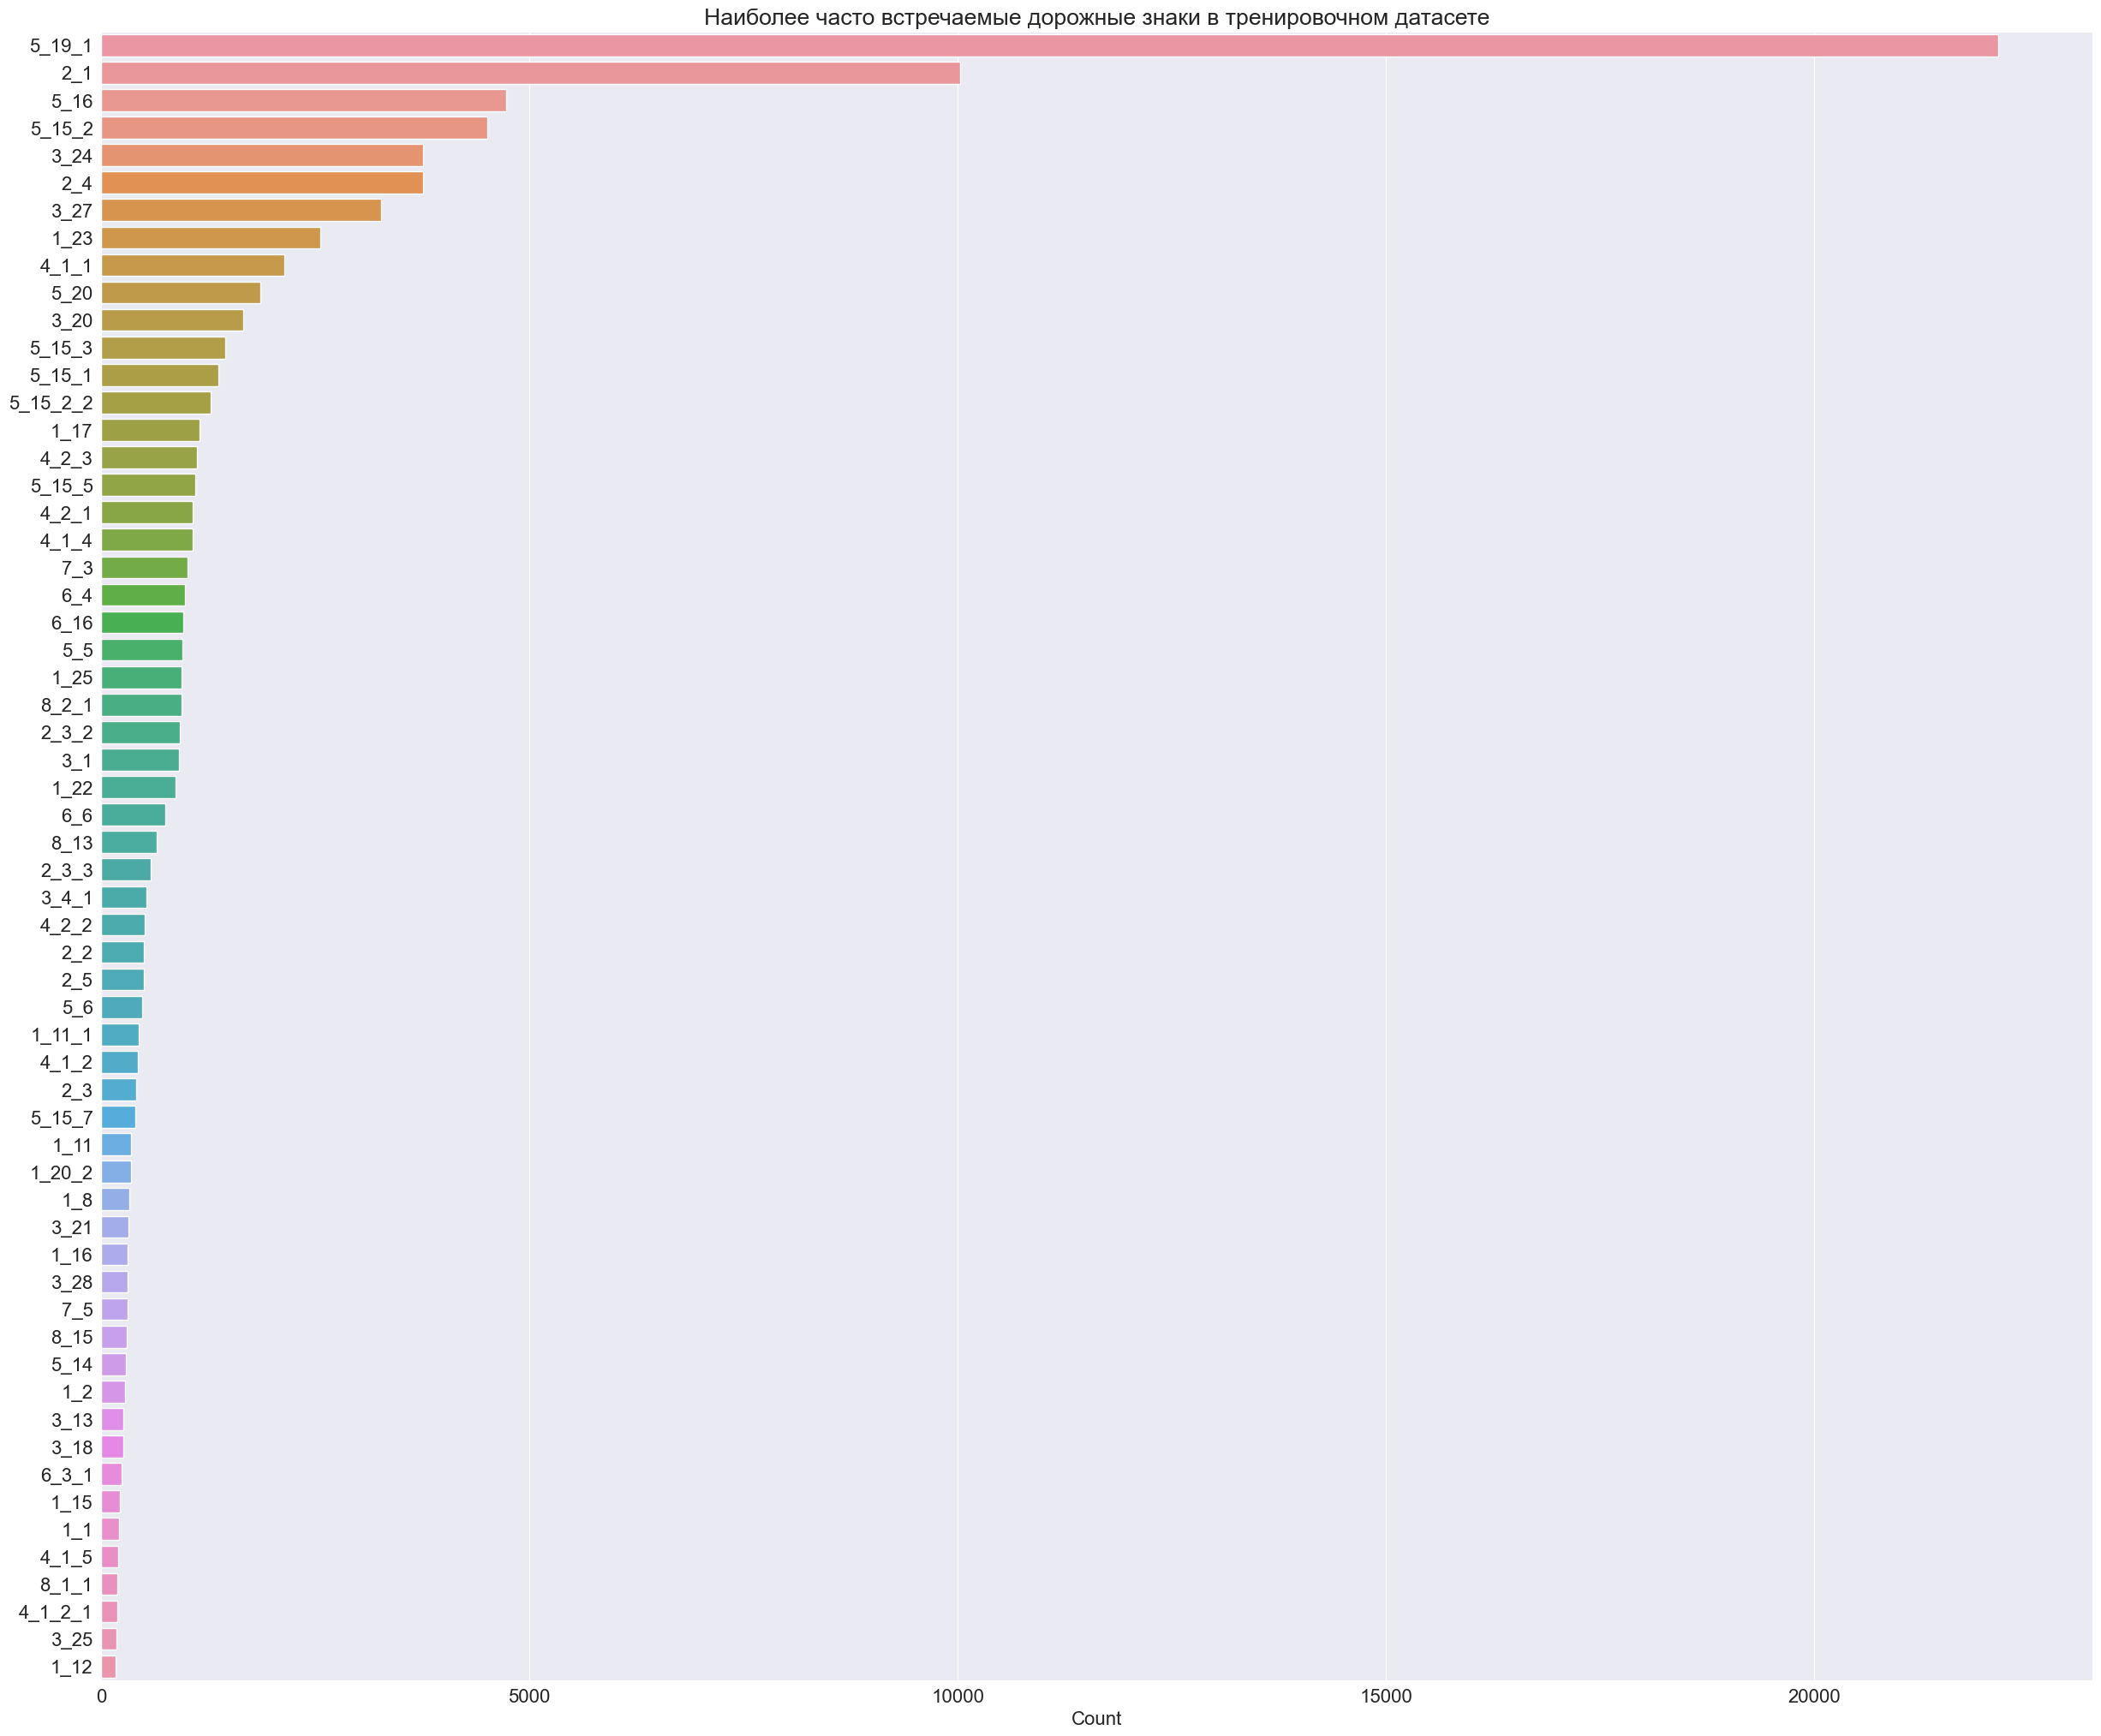

In [334]:
first60_cat_counts = train_labels_df['label'].value_counts()[0:60]
plt.figure(figsize=(30, 25))
plt.xlabel('Count')
ax = sns.barplot(x=first60_cat_counts.values, y=first60_cat_counts.index).set(title='Наиболее часто встречаемые дорожные знаки в тренировочном датасете')

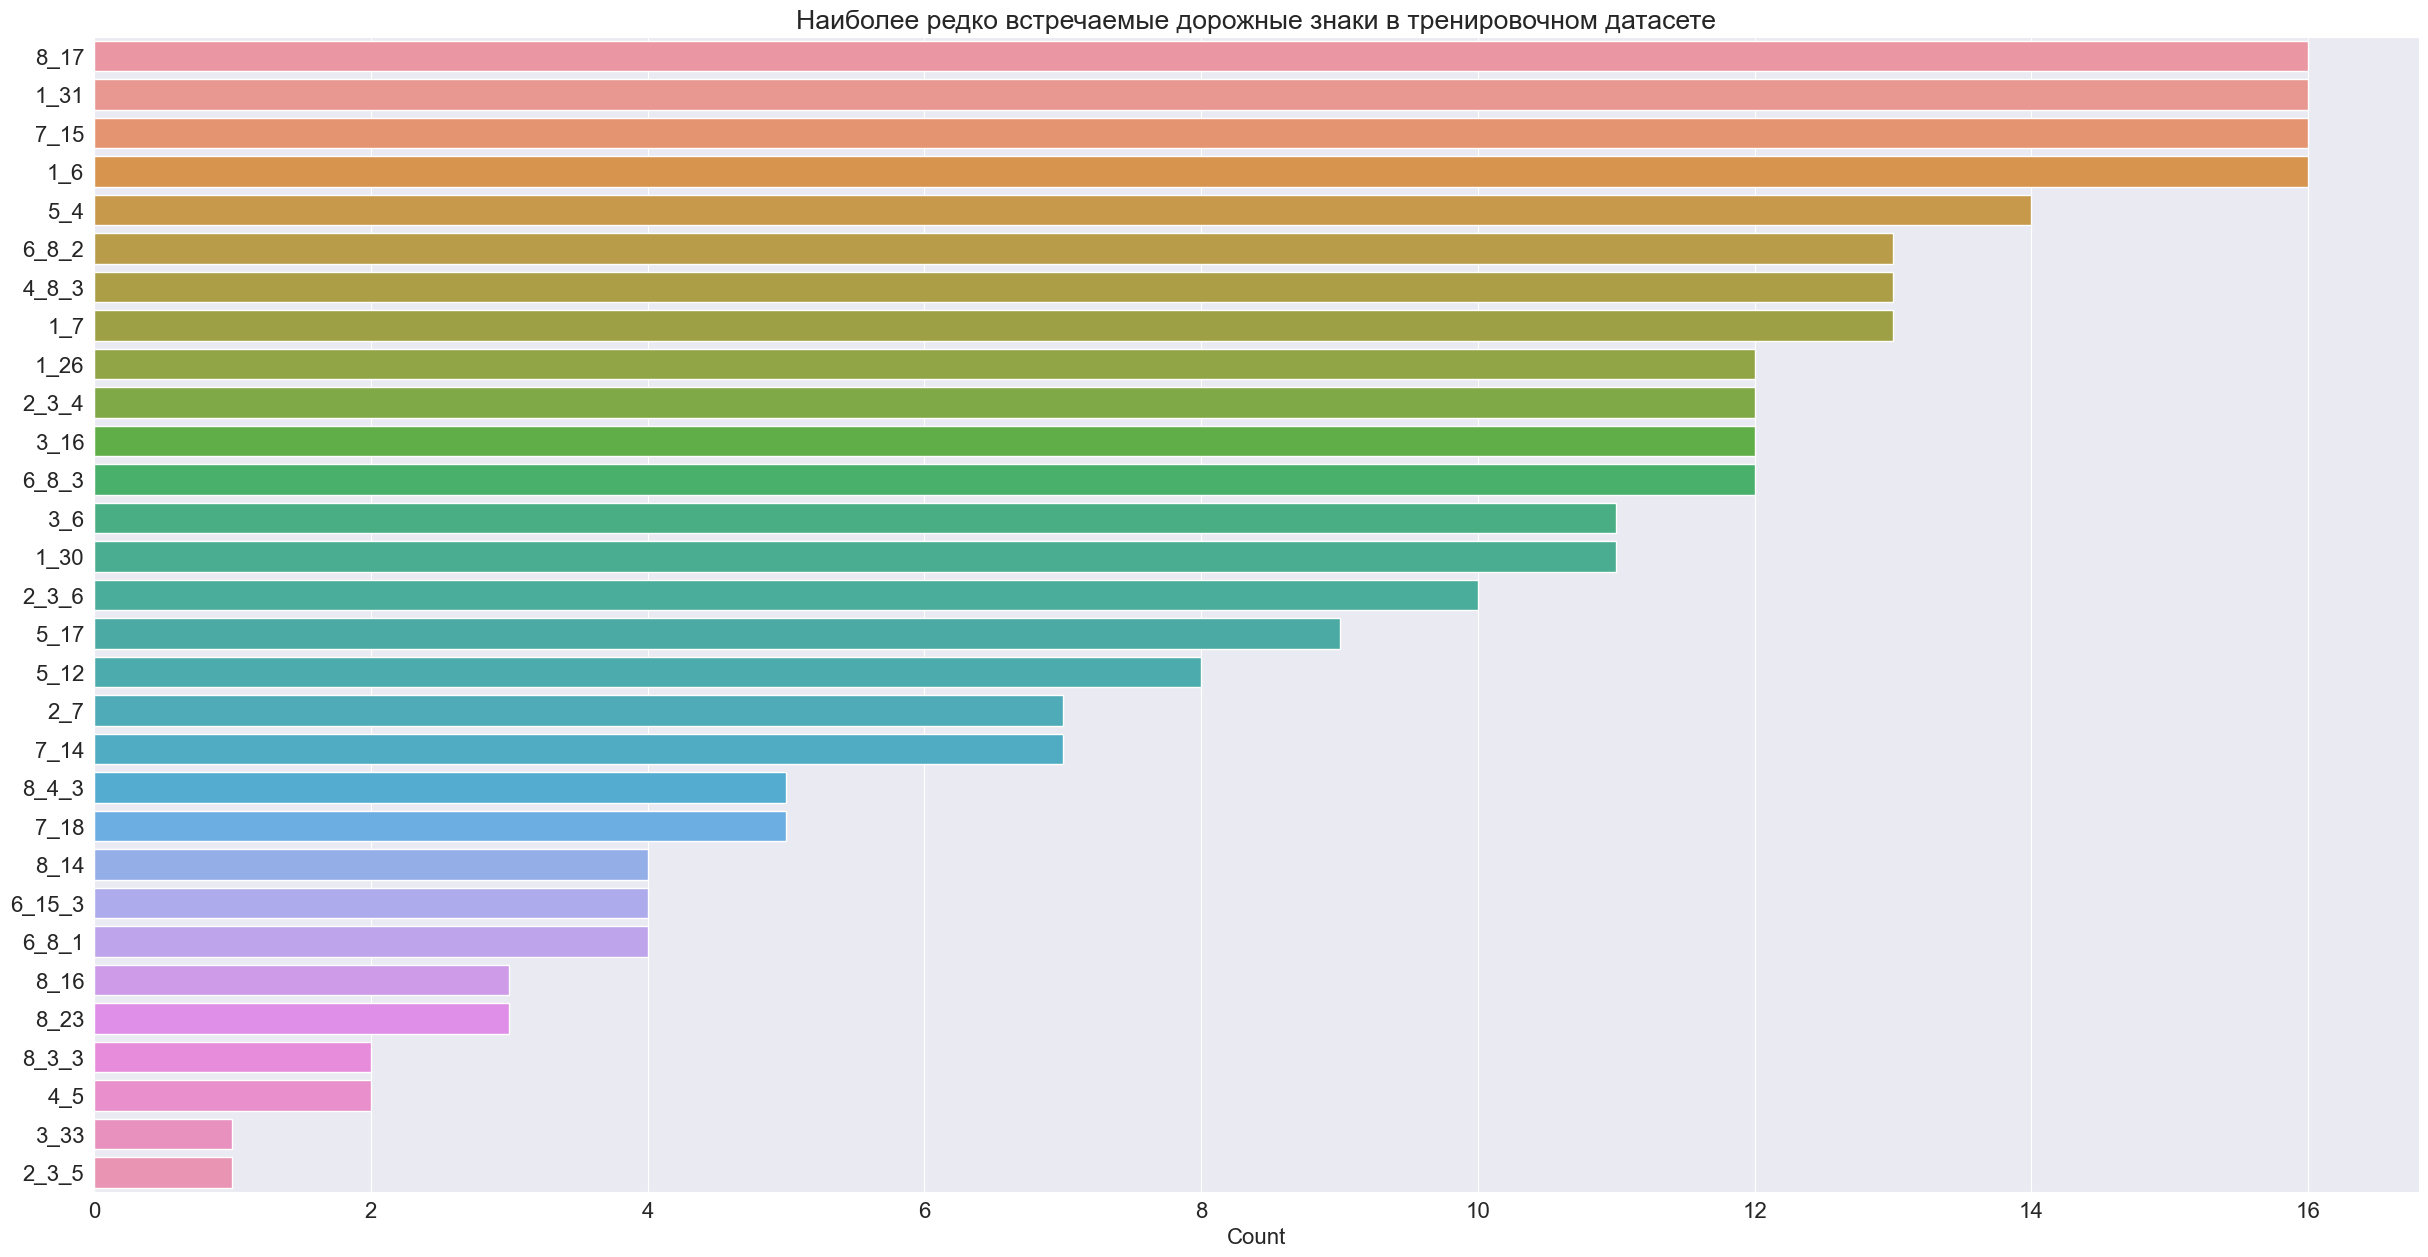

In [335]:
last15_cat_counts = train_labels_df['label'].value_counts()[-30:]
plt.figure(figsize=(30, 15))
plt.xlabel('Count')
ax = sns.barplot(x=last15_cat_counts.values, y=last15_cat_counts.index).set(title='Наиболее редко встречаемые дорожные знаки в тренировочном датасете')

In [336]:
train_labels_df['area'].describe()

count    95492.000000
mean      2022.286799
std       3213.351447
min        256.000000
25%        572.000000
50%        992.000000
75%       2070.000000
max      84560.000000
Name: area, dtype: float64

<AxesSubplot: xlabel='area', ylabel='Count'>

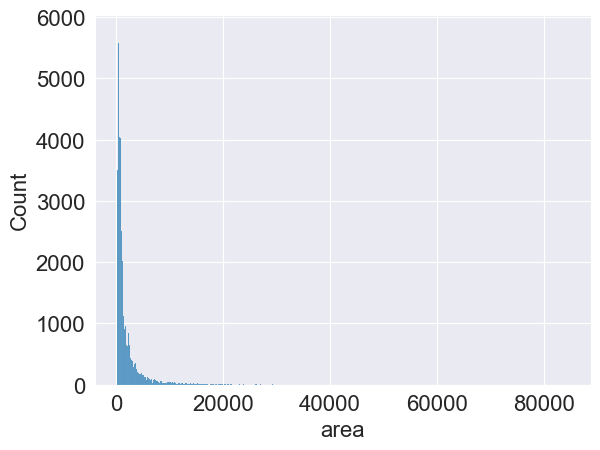

In [337]:
sns.histplot(train_labels_df['area'])

In [338]:
def filter_anno_by_area(df, low_lim):
    except_img_list = list(set(df[df['area'] <= low_lim]['img_name']))
    return df[~df['img_name'].isin(except_img_list)]

area_lim = 850
train_labels_df = filter_anno_by_area(train_labels_df, area_lim)
# train_labels_df = filter_labels_by_area(train_labels_df, 570)

val_labels_df = filter_anno_by_area(val_labels_df, area_lim)
# val_labels_df = filter_labels_by_area(val_labels_df, 570)


print(train_labels_df.shape)
print(val_labels_df.shape)

(39492, 11)
(3654, 11)


In [339]:
first60 = list(first60_cat_counts.index)

In [340]:
def filter_labels_by_label(df, interest_labels):
    df_new = df[df['label'].isin(interest_labels)]
    return df_new


train_labels_df = filter_labels_by_label(train_labels_df, first60)
# train_labels_df = filter_labels_by_label(train_labels_df, ['5_19_1', '2_1', '3_24', '2_4', '3_27', '3_20', '3_1'])


val_labels_df = filter_labels_by_label(val_labels_df, first60)
# val_labels_df = filter_labels_by_label(val_labels_df, ['5_19_1', '2_1', '3_24', '2_4', '3_27', '3_20', '3_1'])



print(train_labels_df.shape)
print(val_labels_df.shape)

(36927, 11)
(3419, 11)


In [341]:
def remove_single_sign_annotation(df):

    img_name_count = df['img_name'].value_counts()
    imgs_with_one_sign = list(img_name_count[img_name_count == 1].index)
    imgs_5_19_1 = list(df[df['label'] == '5_19_1']['img_name'].unique())
    imgs_2_1 = list(df[df['label'] == '2_1']['img_name'].unique())
    imgs_5_16 = list(df[df['label'] == '5_16']['img_name'].unique())
    imgs_5_15_2 = list(df[df['label'] == '5_15_2']['img_name'].unique())

    print(len(imgs_with_one_sign))
    print(len(imgs_5_19_1))
    print(len(imgs_2_1))
    print(len(imgs_5_16))
    print(len(imgs_5_15_2))

    imgs_for_delete = []
    imgs_for_delete.extend(list(set(imgs_with_one_sign) & set(imgs_5_19_1)))
    imgs_for_delete.extend(list(set(imgs_with_one_sign) & set(imgs_2_1)))
    imgs_for_delete.extend(list(set(imgs_with_one_sign) & set(imgs_5_16)))
    imgs_for_delete.extend(list(set(imgs_with_one_sign) & set(imgs_5_15_2)))

    return df[~df['img_name'].isin(imgs_for_delete)]

train_labels_df = remove_single_sign_annotation(train_labels_df)
val_labels_df = remove_single_sign_annotation(val_labels_df)

17108
5701
4481
1844
351
1549
543
423
166
35


In [342]:
print(train_labels_df.shape)
print(val_labels_df.shape)

print(len(train_labels_df['img_name'].unique()))
print(len(val_labels_df['img_name'].unique()))


(30513, 11)
(2841, 11)
18901
1740


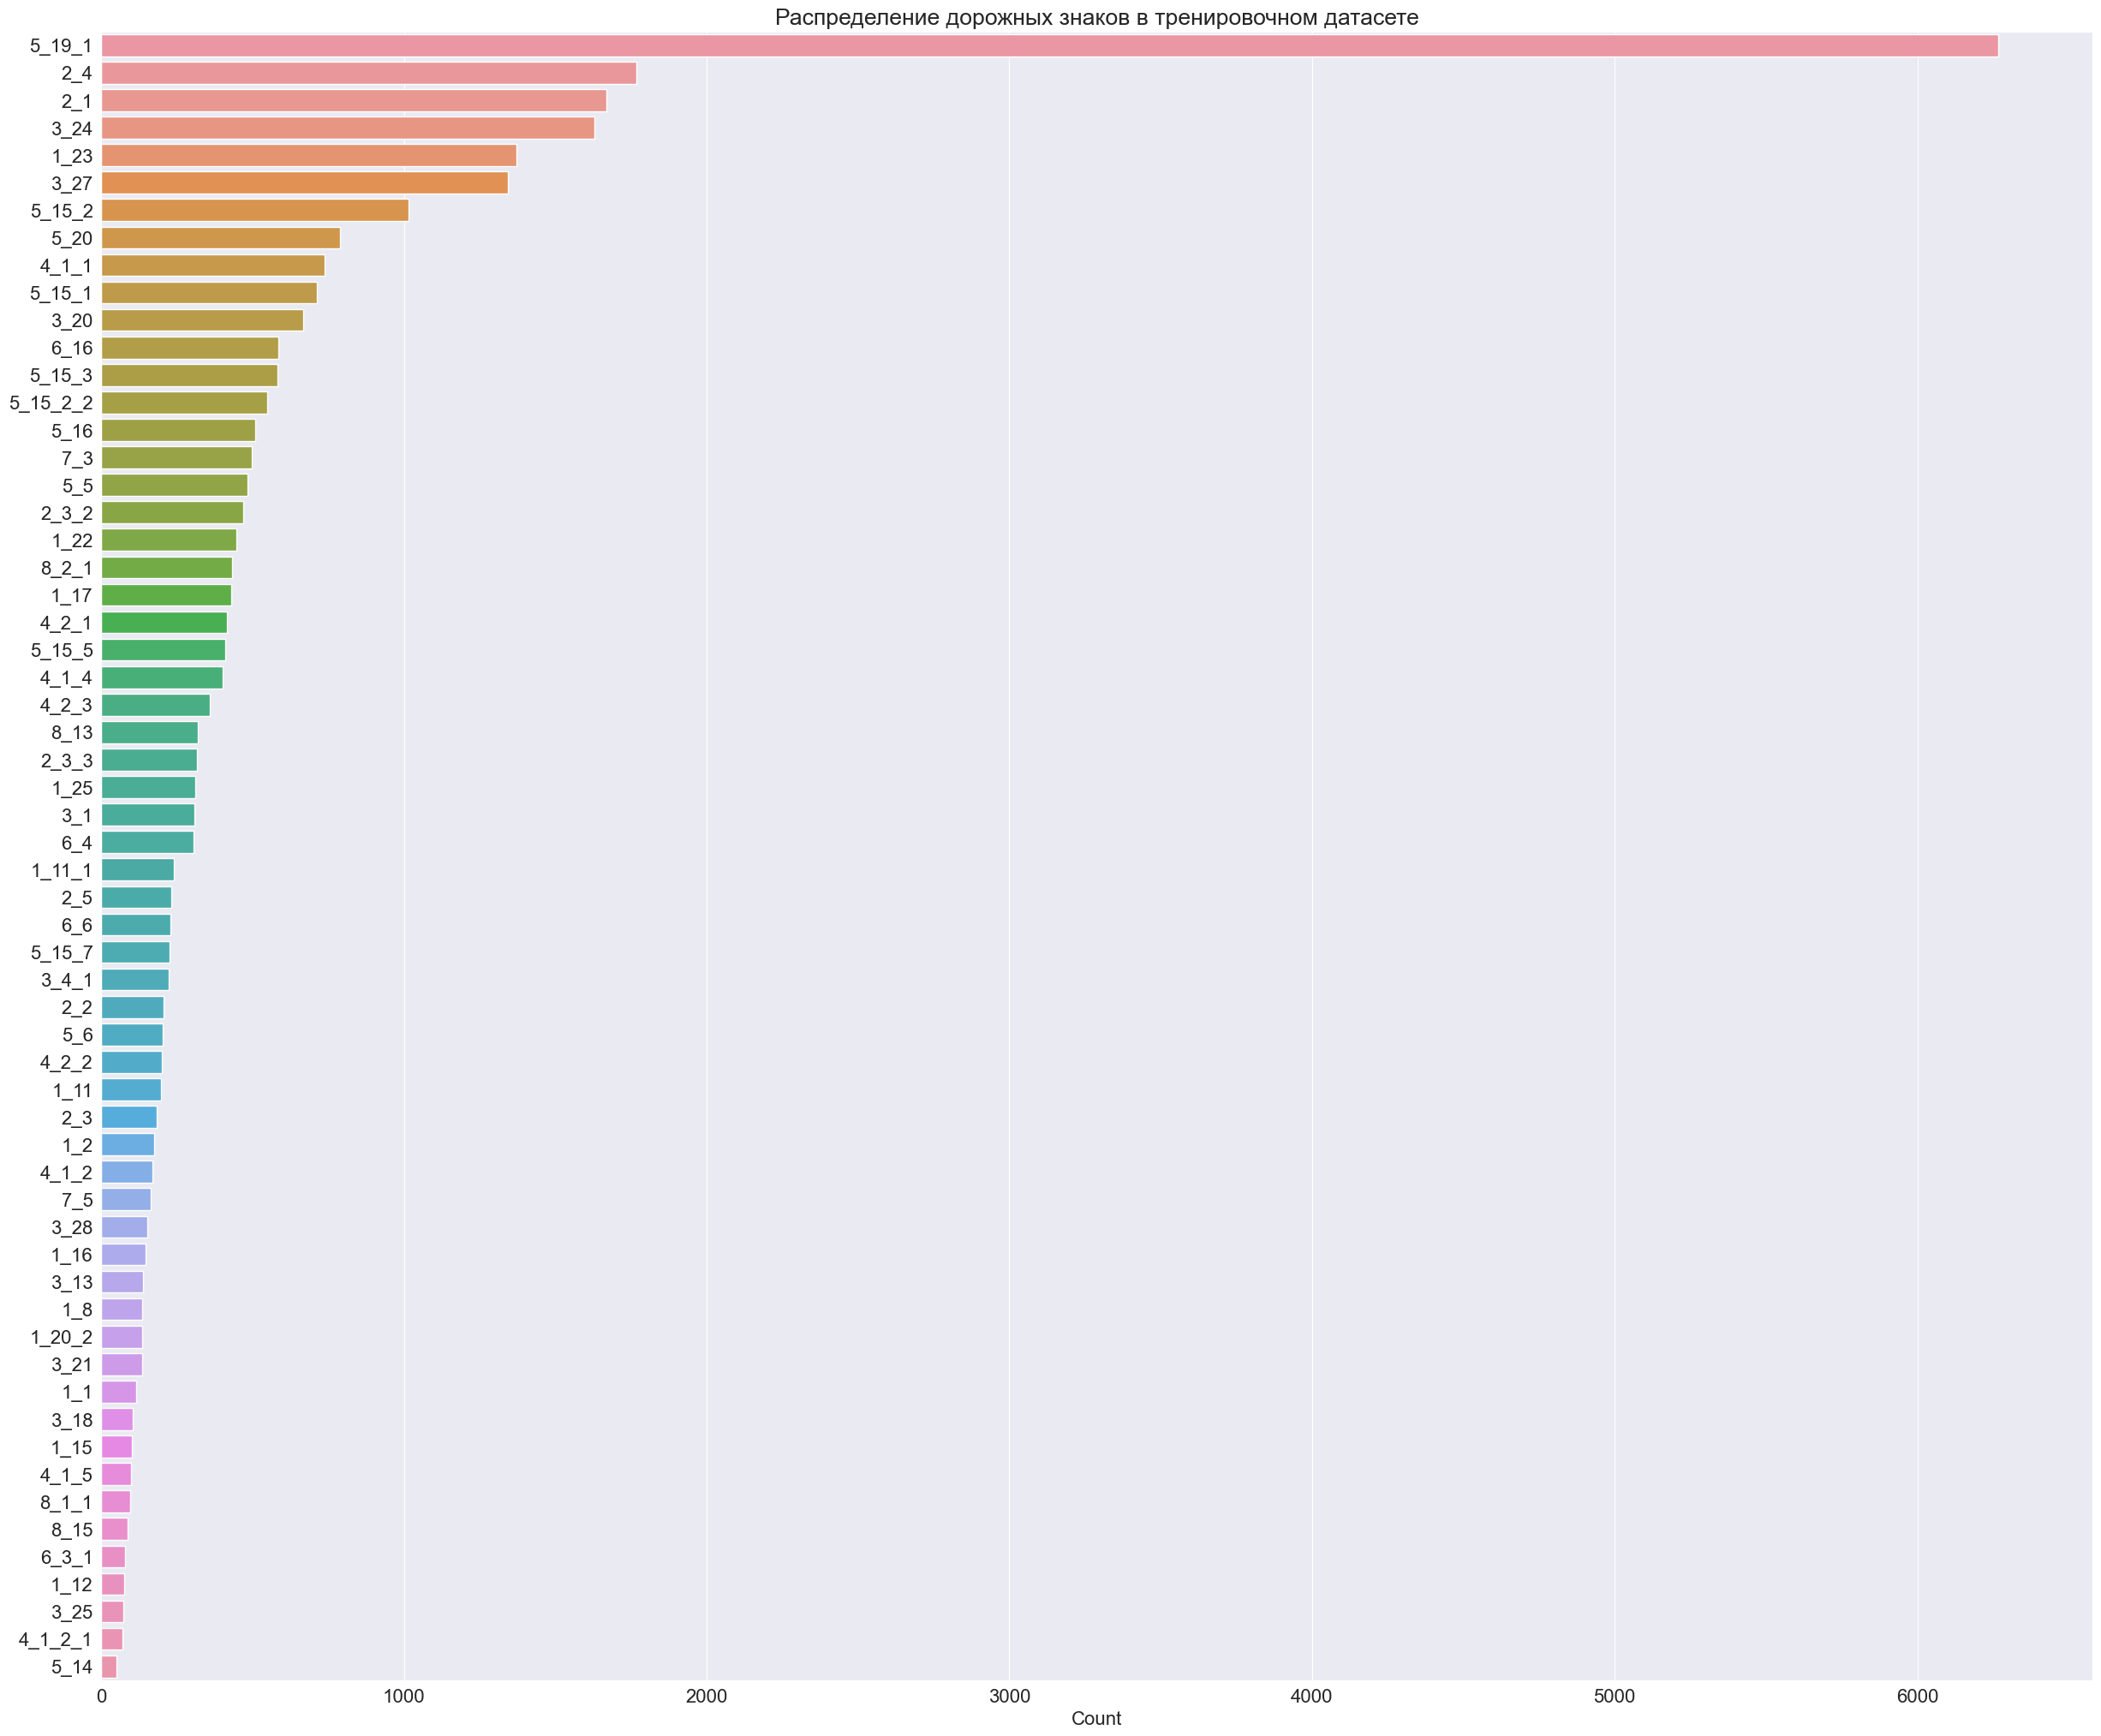

In [343]:
cat_counts = train_labels_df['label'].value_counts()
plt.figure(figsize=(30, 25))
plt.xlabel('Count')
ax = sns.barplot(x=cat_counts.values, y=cat_counts.index).set(title='Распределение дорожных знаков в тренировочном датасете')

In [344]:
classes = list(cat_counts.index[0:50])


In [345]:
classes = list(set(val_labels_df['label'].unique()).intersection(classes))
len(classes)

49

In [346]:
train_labels_df = filter_labels_by_label(train_labels_df, classes)
val_labels_df = filter_labels_by_label(val_labels_df, classes)

In [309]:
# train_labels_df

In [310]:
# classes = train_labels_df['label'].unique().tolist()
# classes

In [347]:
train_labels_df['class'] = train_labels_df['label'].apply(lambda x: classes.index(x))
val_labels_df['class'] = val_labels_df['label'].apply(lambda x: classes.index(x))

train_labels_df.reset_index(inplace=True)
val_labels_df.reset_index(inplace=True)

In [370]:
train_labels_df

,index,id,image_id,category_id,area,bbox,iscrowd,label,img_name_path,img_name,width,height,class
0,8,8,6,2,1932,"[840, 299, 42, 46]",0,1_23,rtsd-frames/autosave01_02_2012_09_13_39.jpg,autosave01_02_2012_09_13_39.jpg,1280,720,28
1,18,18,10,3,5250,"[1076, 32, 75, 70]",0,1_17,rtsd-frames/autosave01_02_2012_09_13_45.jpg,autosave01_02_2012_09_13_45.jpg,1280,720,32
2,19,19,10,2,5226,"[1085, 113, 78, 67]",0,1_23,rtsd-frames/autosave01_02_2012_09_13_45.jpg,autosave01_02_2012_09_13_45.jpg,1280,720,28
3,20,20,10,5,2480,"[1085, 186, 80, 31]",0,8_2_1,rtsd-frames/autosave01_02_2012_09_13_45.jpg,autosave01_02_2012_09_13_45.jpg,1280,720,13
4,27,27,14,6,2544,"[870, 199, 53, 48]",0,5_20,rtsd-frames/autosave01_02_2012_09_13_50.jpg,autosave01_02_2012_09_13_50.jpg,1280,720,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29560,95478,104343,59173,32,1056,"[761, 354, 32, 33]",0,5_15_3,rtsd-frames/autosave24_10_2013_13_18_28_2.jpg,autosave24_10_2013_13_18_28_2.jpg,1280,720,36
29561,95479,104344,59174,32,1680,"[829, 333, 40, 42]",0,5_15_3,rtsd-frames/autosave24_10_2013_13_18_28_3.jpg,autosave24_10_2013_13_18_28_3.jpg,1280,720,36
29562,95480,104346,59176,32,4968,"[1036, 271, 72, 69]",0,5_15_3,rtsd-frames/autosave24_10_2013_13_18_29_1.jpg,autosave24_10_2013_13_18_29_1.jpg,1280,720,36
29563,95490,104356,59186,116,943,"[668, 378, 41, 23]",0,5_15_7,rtsd-frames/autosave24_10_2013_13_18_38_1.jpg,autosave24_10_2013_13_18_38_1.jpg,1280,720,22


In [371]:
train_labels_df[train_labels_df['img_name'] == 'autosave01_02_2012_09_13_45.jpg']

,index,id,image_id,category_id,area,bbox,iscrowd,label,img_name_path,img_name,width,height,class
1,18,18,10,3,5250,"[1076, 32, 75, 70]",0,1_17,rtsd-frames/autosave01_02_2012_09_13_45.jpg,autosave01_02_2012_09_13_45.jpg,1280,720,32
2,19,19,10,2,5226,"[1085, 113, 78, 67]",0,1_23,rtsd-frames/autosave01_02_2012_09_13_45.jpg,autosave01_02_2012_09_13_45.jpg,1280,720,28
3,20,20,10,5,2480,"[1085, 186, 80, 31]",0,8_2_1,rtsd-frames/autosave01_02_2012_09_13_45.jpg,autosave01_02_2012_09_13_45.jpg,1280,720,13


In [349]:
train_labels_df.shape

(29565, 13)

In [350]:
val_labels_df.shape

(2785, 13)

5_19_1 пещеходный переход
2.4 «Уступите дорогу»
3.24 «Ограничение максимальной скорости»
2_1 главная дорога
1.23. «Дети»
3.27 «Остановка запрещена»
5.15.2 «Направление движения по полосe»
5.20 «Искуcственная неровность»
5.15.1 «Направление движения по полосам»
4.1.1 «Движение прямо»
3.20 «Обгон запрещен»
6.16 «Стоп-линия»
5.15.3 «Начало полосы»
5.15.2 «Направление движения по полосe» ?
5.5 «Дорога с односторонним движением»
7.3 «Автозаправочная станция»
2.3.2 «Примыкание второстепенной дороги»
1.22. «Пешеходный переход»
5_16 место остановки автобуса
1.17. «Исскуственная неровность»
...




In [351]:
train_labels_df['label'].value_counts()

5_19_1      6266
2_4         1769
2_1         1669
3_24        1630
1_23        1372
3_27        1342
5_15_2      1014
5_20         788
4_1_1        737
5_15_1       712
3_20         666
6_16         585
5_15_3       581
5_15_2_2     547
5_16         507
7_3          497
5_5          482
2_3_2        470
1_22         447
8_2_1        433
1_17         430
4_2_1        415
5_15_5       410
4_1_4        402
4_2_3        357
8_13         319
2_3_3        315
1_25         310
3_1          307
6_4          304
1_11_1       239
2_5          230
6_6          229
5_15_7       225
3_4_1        222
2_2          207
5_6          204
4_2_2        199
1_11         197
2_3          184
1_2          175
4_1_2        168
7_5          163
3_28         152
1_16         147
3_13         137
1_8          136
1_20_2       134
3_21         134
Name: label, dtype: int64

In [352]:
val_labels_df['label'].value_counts()

5_19_1      577
2_1         180
2_4         159
3_24        139
1_23        124
3_27        119
5_15_2      112
4_1_1        81
6_16         69
5_20         65
5_15_1       63
3_20         60
5_15_3       59
5_15_2_2     50
5_16         48
1_22         46
4_2_1        46
7_3          45
4_1_4        45
2_3_2        42
5_5          41
1_17         38
8_2_1        36
5_15_5       36
6_4          32
1_25         32
5_15_7       30
5_6          29
3_1          29
2_3_3        26
2_5          26
2_2          22
8_13         21
4_1_2        21
3_4_1        21
6_6          20
1_11_1       20
1_11         20
1_2          19
4_2_2        18
3_21         18
4_2_3        18
1_20_2       16
3_28         16
7_5          14
3_13         10
2_3          10
1_16          9
1_8           8
Name: label, dtype: int64

In [353]:
train_labels_df.describe()

,index,id,image_id,category_id,area,iscrowd,width,height,class
count,29565.000000,29565.000000,29565.000000,29565.000000,29565.000000,29565.0,29565.000000,29565.000000,29565.000000
mean,47513.077659,51884.690918,29191.495857,25.363436,3227.359614,0.0,1475.885676,830.185693,20.623305
std,27001.868538,29504.980328,15942.803262,25.408331,3763.187760,0.0,294.955212,165.912307,12.783013
min,8.000000,8.000000,6.000000,1.000000,851.000000,0.0,1280.000000,720.000000,0.000000
25%,25001.000000,27260.000000,16648.000000,7.000000,1292.000000,0.0,1280.000000,720.000000,11.000000
50%,47637.000000,52072.000000,29321.000000,13.000000,1980.000000,0.0,1280.000000,720.000000,20.000000
75%,69689.000000,76043.000000,41230.000000,43.000000,3534.000000,0.0,1920.000000,1080.000000,28.000000
max,95491.000000,104357.000000,59187.000000,116.000000,66981.000000,0.0,1920.000000,1080.000000,48.000000


In [354]:
val_labels_df.describe()

,index,id,image_id,category_id,area,iscrowd,width,height,class
count,2785.000000,2785.000000,2785.00000,2785.000000,2785.000000,2785.0,2785.000000,2785.000000,2785.000000
mean,4502.288330,53515.867504,30077.20000,25.975943,3330.600000,0.0,1477.400359,831.037702,20.525673
std,2531.124108,29446.014340,15909.12361,26.249120,3899.798139,0.0,295.636112,166.295313,12.782840
min,16.000000,53.000000,28.00000,1.000000,851.000000,0.0,1280.000000,720.000000,0.000000
25%,2287.000000,29347.000000,18043.00000,7.000000,1296.000000,0.0,1280.000000,720.000000,11.000000
50%,4476.000000,53765.000000,29966.00000,13.000000,1980.000000,0.0,1280.000000,720.000000,20.000000
75%,6695.000000,78083.000000,42328.00000,43.000000,3658.000000,0.0,1920.000000,1080.000000,28.000000
max,8862.000000,104345.000000,59175.00000,116.000000,48438.000000,0.0,1920.000000,1080.000000,48.000000


In [355]:
# len(train_labels_df[train_labels_df['label'] == '3_24']['img_name'].unique())

In [356]:
classes

['2_4',
 '5_15_2',
 '6_4',
 '4_1_1',
 '3_27',
 '8_13',
 '1_11_1',
 '1_25',
 '5_15_1',
 '5_15_5',
 '3_28',
 '5_20',
 '4_2_1',
 '8_2_1',
 '4_1_2',
 '4_2_2',
 '6_16',
 '3_4_1',
 '2_3_3',
 '1_8',
 '5_19_1',
 '7_5',
 '5_15_7',
 '5_6',
 '3_21',
 '3_24',
 '1_20_2',
 '2_1',
 '1_23',
 '5_15_2_2',
 '5_16',
 '3_20',
 '1_17',
 '3_13',
 '2_3_2',
 '1_16',
 '5_15_3',
 '2_2',
 '1_22',
 '4_2_3',
 '1_2',
 '5_5',
 '3_1',
 '2_3',
 '7_3',
 '2_5',
 '4_1_4',
 '6_6',
 '1_11']

In [369]:
with open('classes.txt', 'w') as f:
    for cl in classes:
        f.write(f"{cl}\n")

In [374]:
import json
with open('classes_list.txt', 'w') as f:
    classes_str = json.dumps(classes)
    f.write(classes_str)

In [357]:
len(val_labels_df['img_name'].unique())

1718

In [358]:
len(train_labels_df['img_name'].unique())

18497

In [359]:
# train_labels_df[train_labels_df['label'] == '1_2']

In [360]:
# ser = train_labels_df['label'].value_counts()
# ser[ser.index == '2_5']
# # ['5_19_1', '2_1', '3_24', '2_4', '3_27', '3_20', '3_1']
# ['2_1', '3_24', '5_19_1', '2_4', '3_27', '3_1', '3_20']

In [361]:
def make_annotations(labels_df):
    img_dict = defaultdict(list)

    for idx in tqdm(range(len(labels_df))):
        sample_label_list = []
        img_name = labels_df.loc[idx, 'img_name']
        x = labels_df.loc[idx, 'bbox'][0]
        y = labels_df.loc[idx, 'bbox'][1]
        w = labels_df.loc[idx, 'bbox'][2]
        h = labels_df.loc[idx, 'bbox'][3]
        class_num = labels_df.loc[idx, 'class']
        W, H = int(labels_df.loc[idx, 'width']), int(labels_df.loc[idx, 'height'])

        coco_bbox = (int(x), int(y) ,int(w), int(h))

        x_center, y_center, w, h = pbx.convert_bbox(coco_bbox, from_type="coco", to_type="yolo", image_size=(W,H))

        sample_label_list.append(str(class_num))
        sample_label_list.append(str(x_center))
        sample_label_list.append(str(y_center))
        sample_label_list.append(str(w))
        sample_label_list.append(str(h))
        line = ' '.join(sample_label_list)

        img_dict[img_name].append(line)
    return img_dict

train_img_labels = make_annotations(train_labels_df)
val_img_labels = make_annotations(val_labels_df)

100%|██████████| 2785/2785 [00:00<00:00, 6044.26it/s]


In [20]:
train_labels_df

,id,image_id,class,area,bbox,iscrowd,label,img_name_path,img_name,width,height
2,2,2,0,702,"[711, 332, 27, 26]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_35.jpg,autosave01_02_2012_09_13_35.jpg,1280,720
3,3,3,0,1332,"[764, 290, 37, 36]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_36.jpg,autosave01_02_2012_09_13_36.jpg,1280,720
5,5,4,0,3192,"[876, 200, 56, 57]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_37.jpg,autosave01_02_2012_09_13_37.jpg,1280,720
17,17,9,3,1122,"[848, 328, 34, 33]",0,3_24,rtsd-frames/autosave01_02_2012_09_13_44.jpg,autosave01_02_2012_09_13_44.jpg,1280,720
25,25,13,3,702,"[787, 313, 27, 26]",0,3_24,rtsd-frames/autosave01_02_2012_09_13_49.jpg,autosave01_02_2012_09_13_49.jpg,1280,720
...,...,...,...,...,...,...,...,...,...,...,...
95482,104348,59178,0,1225,"[713, 361, 35, 35]",0,2_1,rtsd-frames/autosave24_10_2013_13_18_34_2.jpg,autosave24_10_2013_13_18_34_2.jpg,1280,720
95483,104349,59179,0,1763,"[752, 348, 41, 43]",0,2_1,rtsd-frames/autosave24_10_2013_13_18_34_3.jpg,autosave24_10_2013_13_18_34_3.jpg,1280,720
95484,104350,59180,0,1936,"[761, 345, 44, 44]",0,2_1,rtsd-frames/autosave24_10_2013_13_18_35_0.jpg,autosave24_10_2013_13_18_35_0.jpg,1280,720
95485,104351,59181,0,3190,"[830, 323, 55, 58]",0,2_1,rtsd-frames/autosave24_10_2013_13_18_35_1.jpg,autosave24_10_2013_13_18_35_1.jpg,1280,720


In [18]:
train_img_labels

defaultdict(list,
            {'autosave01_02_2012_09_13_33.jpg': ['1 0.5140625 0.5347222222222222 0.0140625 0.025'],
             'autosave01_02_2012_09_13_34.jpg': ['1 0.53203125 0.5090277777777777 0.015625 0.029166666666666667'],
             'autosave01_02_2012_09_13_35.jpg': ['1 0.566015625 0.4791666666666667 0.02109375 0.03611111111111111'],
             'autosave01_02_2012_09_13_36.jpg': ['1 0.611328125 0.42777777777777776 0.02890625 0.05',
              '2 0.541015625 0.5451388888888888 0.01328125 0.02361111111111111'],
             'autosave01_02_2012_09_13_37.jpg': ['1 0.70625 0.3173611111111111 0.04375 0.07916666666666666',
              '2 0.559375 0.5381944444444444 0.0171875 0.029166666666666667'],
             'autosave01_02_2012_09_13_38.jpg': ['2 0.5953125 0.5076388888888889 0.0203125 0.034722222222222224'],
             'autosave01_02_2012_09_13_39.jpg': ['2 0.67265625 0.44722222222222224 0.0328125 0.06388888888888888'],
             'autosave01_02_2012_09_13_42.jpg':

In [362]:
def write_annotations(img_dict, dst):
    labels_dir = dst
    if os.path.exists(labels_dir):
        shutil.rmtree(labels_dir)
    os.makedirs(labels_dir)

    for img_name, lines in img_dict.items():
        img_name = img_name.split('.')[0]
        with open(f'{labels_dir}/{img_name}.txt', 'w') as f:
            for line in lines:
                f.write(line)
                f.write('\n')

train_dir = output_path + '/data/train'
val_dir = output_path + '/data/val'

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)

os.makedirs(train_dir)
os.makedirs(val_dir)

os.mkdir(train_dir + '/images')
os.mkdir(train_dir + '/labels')
os.mkdir(val_dir + '/images')
os.mkdir(val_dir + '/labels')




In [363]:
write_annotations(train_img_labels, train_dir + '/labels')

In [364]:
write_annotations(val_img_labels, val_dir + '/labels')

dict_keys(['autosave01_02_2012_09_13_33.jpg', 'autosave01_02_2012_09_13_34.jpg', 'autosave01_02_2012_09_13_35.jpg', 'autosave01_02_2012_09_13_36.jpg', 'autosave01_02_2012_09_13_37.jpg', 'autosave01_02_2012_09_13_38.jpg', 'autosave01_02_2012_09_13_39.jpg', 'autosave01_02_2012_09_13_42.jpg', 'autosave01_02_2012_09_13_43.jpg', 'autosave01_02_2012_09_13_44.jpg', 'autosave01_02_2012_09_13_45.jpg', 'autosave01_02_2012_09_13_47.jpg', 'autosave01_02_2012_09_13_48.jpg', 'autosave01_02_2012_09_13_49.jpg', 'autosave01_02_2012_09_13_50.jpg', 'autosave01_02_2012_09_13_51.jpg', 'autosave01_02_2012_09_13_55.jpg', 'autosave01_02_2012_09_13_57.jpg', 'autosave01_02_2012_09_13_58.jpg', 'autosave01_02_2012_09_13_59.jpg', 'autosave01_02_2012_09_14_00.jpg', 'autosave01_02_2012_09_14_01.jpg', 'autosave01_02_2012_09_14_02.jpg', 'autosave01_02_2012_09_14_03.jpg', 'autosave01_02_2012_09_14_04.jpg', 'autosave01_02_2012_09_14_05.jpg', 'autosave01_02_2012_09_14_06.jpg', 'autosave01_02_2012_09_14_12.jpg', 'autosave

In [365]:
train_files, val_files = list(train_img_labels.keys()), list(val_img_labels.keys())

# copy_files(images_path, train_dir, train_files)
# copy_files(images_path, val_dir, val_files)

In [366]:
def copy_files(images_path, destination_path, files):
    for file_name in files:
        src = images_path + f'/{file_name}'
        dst = destination_path + '/images'
        shutil.copy(src, dst)

In [367]:
copy_files(images_path, train_dir, train_files)

In [368]:
copy_files(images_path, val_dir, val_files)

In [376]:
images_list = os.listdir(images_path)

In [377]:
len(images_list)

179138

In [2]:
from pathlib import Path

FILE = Path(__file__).resolve()

NameError: name '__file__' is not defined

In [3]:
Path().resolve()

WindowsPath('E:/ds/final_projects/traffic_sign_recognition/notebooks')